In [7]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, shapiro, ttest_rel, wilcoxon

In [8]:
distance_metric = "mahal"
top_cutoff = 1000
aligner = "mafft"
bats_path = Path("bat_msas").resolve()
others_path = Path("other_msas").resolve()

datasets = [data.stem for data in bats_path.iterdir()]


print(bats_path)

/home/pupkolab/Dev/bat_analysis/bat_msas


In [9]:
indel_params = {
    "data_set": [],
    "insertion_rate_bats": [],
    "deletion_rate_bats": [],
    "insertion_length_bats": [],
    "deletion_length_bats": [],
    "insertion_rate_others": [],
    "deletion_rate_others": [],
    "insertion_length_others": [],
    "deletion_length_others": [],
}

In [4]:
"a" or ["asdf"]

'a'

In [10]:
def read_model_file(file_path: Path):
    model_ = file_path.read_text().splitlines()
    model_ = [line.split(": ") for line in model_[1:]]
    model_ = {key: float(val) for (key,val) in model_}

    model = {}
    model["root_length"] = int(model_.get("Root_length"))
    model["rate_insertion"] = model_.get("R_I") or model_.get("R_ID")
    model["rate_deletion"] = model_.get("R_D") or model_.get("R_ID")
    model["length_param_insertion"] = model_.get("A_I") or model_.get("A_ID")
    model["length_param_deletion"] = model_.get("A_D") or model_.get("A_ID")

    return model



In [11]:
for dataset in sorted(others_path.iterdir()):
    if (model_file := dataset / "model_params.txt").exists():
        print(dataset.stem)
        model = read_model_file(model_file)
        indel_params["data_set"].append(dataset.stem)
        indel_params["insertion_rate_others"].append(model["rate_insertion"])
        indel_params["deletion_rate_others"].append(model["rate_deletion"])
        indel_params["insertion_length_others"].append(model["length_param_insertion"])
        indel_params["deletion_length_others"].append(model["length_param_deletion"])

100129271_NT_AL_AA
100130274_NT_AL_AA
100131017_NT_AL_AA
11095_NT_AL_AA
11173_NT_AL_AA
121006_NT_AL_AA
128061_NT_AL_AA
139378_NT_AL_AA
148870_NT_AL_AA
151649_NT_AL_AA
1539_NT_AL_AA
1609_NT_AL_AA
164592_NT_AL_AA
168090_NT_AL_AA
1816_NT_AL_AA
22994_NT_AL_AA
238_NT_AL_AA
2515_NT_AL_AA
2523_NT_AL_AA
256815_NT_AL_AA
26153_NT_AL_AA
26505_NT_AL_AA
283643_NT_AL_AA
319089_NT_AL_AA
342125_NT_AL_AA
3454_NT_AL_AA
3603_NT_AL_AA
3665_NT_AL_AA
374654_NT_AL_AA
399693_NT_AL_AA
4851_NT_AL_AA
51252_NT_AL_AA
54102_NT_AL_AA
57188_NT_AL_AA
57597_NT_AL_AA
63901_NT_AL_AA
64434_NT_AL_AA
64759_NT_AL_AA
65250_NT_AL_AA
7984_NT_AL_AA
79925_NT_AL_AA
83987_NT_AL_AA
84074_NT_AL_AA
84689_NT_AL_AA
84886_NT_AL_AA
90381_NT_AL_AA
91752_NT_AL_AA


In [12]:
for dataset in sorted(bats_path.iterdir()):
    model_file = dataset / "model_params.txt"
    if (others_path / dataset.stem / "model_params.txt").exists():
        print(dataset.stem)
        model = read_model_file(model_file)
        indel_params["insertion_rate_bats"].append(model["rate_insertion"])
        indel_params["deletion_rate_bats"].append(model["rate_deletion"])
        indel_params["insertion_length_bats"].append(model["length_param_insertion"])
        indel_params["deletion_length_bats"].append(model["length_param_deletion"])

100129271_NT_AL_AA
100130274_NT_AL_AA
100131017_NT_AL_AA
11095_NT_AL_AA
11173_NT_AL_AA
121006_NT_AL_AA
128061_NT_AL_AA
139378_NT_AL_AA
148870_NT_AL_AA
151649_NT_AL_AA
1539_NT_AL_AA
1609_NT_AL_AA
164592_NT_AL_AA
168090_NT_AL_AA
1816_NT_AL_AA
22994_NT_AL_AA
238_NT_AL_AA
2515_NT_AL_AA
2523_NT_AL_AA
256815_NT_AL_AA
26153_NT_AL_AA
26505_NT_AL_AA
283643_NT_AL_AA
319089_NT_AL_AA
342125_NT_AL_AA
3454_NT_AL_AA
3603_NT_AL_AA
3665_NT_AL_AA
374654_NT_AL_AA
399693_NT_AL_AA
4851_NT_AL_AA
51252_NT_AL_AA
54102_NT_AL_AA
57188_NT_AL_AA
57597_NT_AL_AA
63901_NT_AL_AA
64434_NT_AL_AA
64759_NT_AL_AA
65250_NT_AL_AA
7984_NT_AL_AA
79925_NT_AL_AA
83987_NT_AL_AA
84074_NT_AL_AA
84689_NT_AL_AA
84886_NT_AL_AA
90381_NT_AL_AA
91752_NT_AL_AA


In [13]:
indel_params

{'data_set': ['100129271_NT_AL_AA',
  '100130274_NT_AL_AA',
  '100131017_NT_AL_AA',
  '11095_NT_AL_AA',
  '11173_NT_AL_AA',
  '121006_NT_AL_AA',
  '128061_NT_AL_AA',
  '139378_NT_AL_AA',
  '148870_NT_AL_AA',
  '151649_NT_AL_AA',
  '1539_NT_AL_AA',
  '1609_NT_AL_AA',
  '164592_NT_AL_AA',
  '168090_NT_AL_AA',
  '1816_NT_AL_AA',
  '22994_NT_AL_AA',
  '238_NT_AL_AA',
  '2515_NT_AL_AA',
  '2523_NT_AL_AA',
  '256815_NT_AL_AA',
  '26153_NT_AL_AA',
  '26505_NT_AL_AA',
  '283643_NT_AL_AA',
  '319089_NT_AL_AA',
  '342125_NT_AL_AA',
  '3454_NT_AL_AA',
  '3603_NT_AL_AA',
  '3665_NT_AL_AA',
  '374654_NT_AL_AA',
  '399693_NT_AL_AA',
  '4851_NT_AL_AA',
  '51252_NT_AL_AA',
  '54102_NT_AL_AA',
  '57188_NT_AL_AA',
  '57597_NT_AL_AA',
  '63901_NT_AL_AA',
  '64434_NT_AL_AA',
  '64759_NT_AL_AA',
  '65250_NT_AL_AA',
  '7984_NT_AL_AA',
  '79925_NT_AL_AA',
  '83987_NT_AL_AA',
  '84074_NT_AL_AA',
  '84689_NT_AL_AA',
  '84886_NT_AL_AA',
  '90381_NT_AL_AA',
  '91752_NT_AL_AA'],
 'insertion_rate_bats': [0.0103056

In [14]:
comparison_df = pd.DataFrame(indel_params)
comparison_df

,data_set,insertion_rate_bats,deletion_rate_bats,insertion_length_bats,deletion_length_bats,insertion_rate_others,deletion_rate_others,insertion_length_others,deletion_length_others
0,100129271_NT_AL_AA,0.010306,0.032727,1.553462,1.447491,0.008133,0.038058,1.505897,1.129714
1,100130274_NT_AL_AA,0.009371,0.032657,1.521298,1.211807,0.007227,0.038790,1.496288,1.081760
2,100131017_NT_AL_AA,0.019523,0.019523,1.184609,1.184609,0.007100,0.038261,1.537493,1.111844
3,11095_NT_AL_AA,0.008964,0.025179,1.527128,1.312639,0.003108,0.003108,1.251622,1.251622
4,11173_NT_AL_AA,0.009220,0.029961,1.563803,1.170455,0.006803,0.038163,1.564732,1.094604
5,121006_NT_AL_AA,0.008640,0.033129,1.540832,1.176971,0.007676,0.039800,1.412187,1.056848
6,128061_NT_AL_AA,0.008475,0.030787,1.530067,1.201783,0.007543,0.038295,1.495725,1.101342
7,139378_NT_AL_AA,0.008427,0.024711,1.522007,1.165409,0.014039,0.030103,1.477750,1.204762
8,148870_NT_AL_AA,0.007694,0.036430,1.484668,1.145050,0.007277,0.039064,1.558371,1.079199
9,151649_NT_AL_AA,0.008550,0.033187,1.523216,1.238706,0.007847,0.038010,1.542774,1.090387


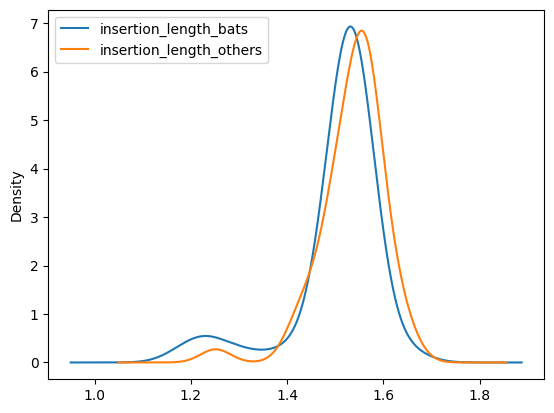

In [ ]:
# ax.set_ylim(0, 0.1)
# ax.set_xlim(0, 0.1)
# ax.axline((0, 0), slope=1)

In [16]:
shapiro(comparison_df["deletion_length_others"]), shapiro(comparison_df["deletion_length_bats"])

(ShapiroResult(statistic=0.6929701493274626, pvalue=1.273509478334019e-08),
 ShapiroResult(statistic=0.8661999851933098, pvalue=7.086293836314862e-05))

In [17]:
wilcoxon(comparison_df["insertion_rate_bats"], comparison_df["insertion_rate_others"])

WilcoxonResult(statistic=197.0, pvalue=4.8906113462976464e-05)

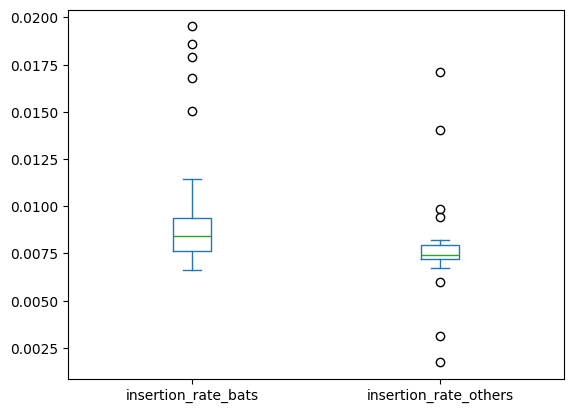

In [31]:
ax = comparison_df[["insertion_rate_bats", "insertion_rate_others"]].plot.box()


In [18]:
wilcoxon(comparison_df["deletion_rate_bats"], comparison_df["deletion_rate_others"])

WilcoxonResult(statistic=124.0, pvalue=4.764315661986984e-07)

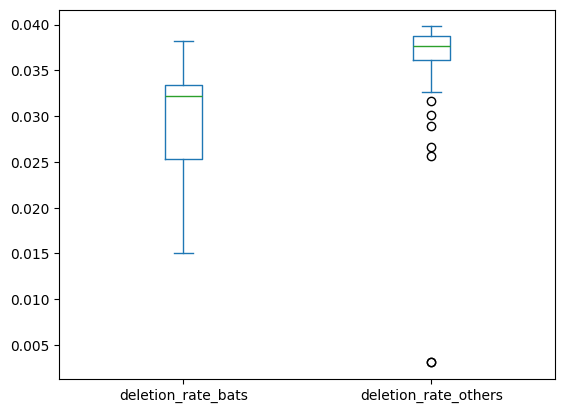

In [30]:
ax = comparison_df[["deletion_rate_bats", "deletion_rate_others"]].plot.box()


In [21]:
comparison_df.columns

Index(['data_set', 'insertion_rate_bats', 'deletion_rate_bats',
       'insertion_length_bats', 'deletion_length_bats',
       'insertion_rate_others', 'deletion_rate_others',
       'insertion_length_others', 'deletion_length_others'],
      dtype='object')

In [22]:
wilcoxon(comparison_df["insertion_length_bats"], comparison_df["insertion_length_others"])

WilcoxonResult(statistic=402.0, pvalue=0.0875328672199771)

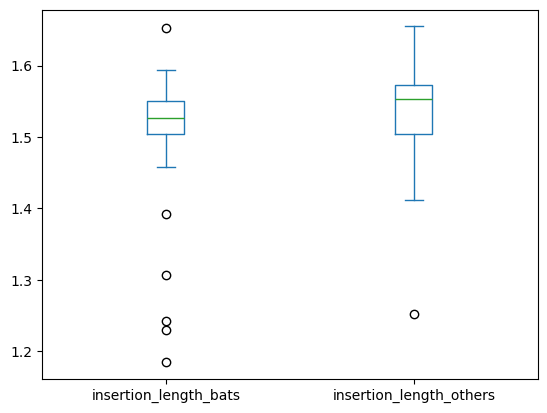

In [29]:
ax = comparison_df[["insertion_length_bats", "insertion_length_others"]].plot.box()


In [24]:
wilcoxon(comparison_df["deletion_length_bats"], comparison_df["deletion_length_others"])

WilcoxonResult(statistic=36.0, pvalue=7.074163477227557e-11)

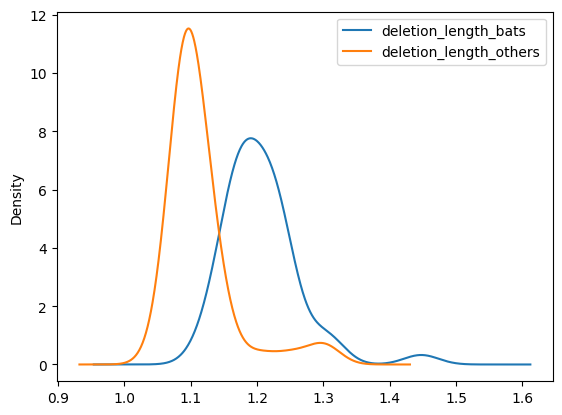

In [25]:
ax = comparison_df[["deletion_length_bats", "deletion_length_others"]].plot.kde()


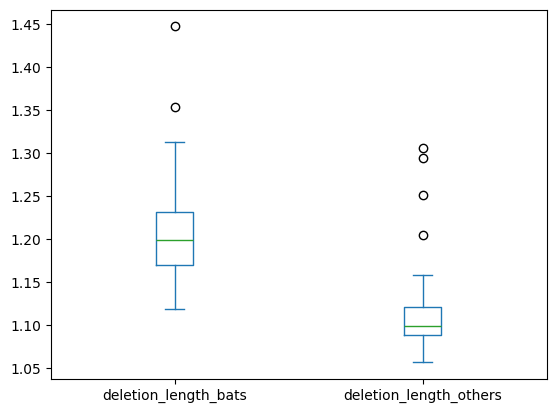

In [17]:
ax = comparison_df[["deletion_length_bats", "deletion_length_others"]].plot.box()

In [26]:
comparison_df.describe()

,insertion_rate_bats,deletion_rate_bats,insertion_length_bats,deletion_length_bats,insertion_rate_others,deletion_rate_others,insertion_length_others,deletion_length_others
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.009360,0.029569,1.505030,1.206375,0.007692,0.035237,1.535220,1.114299
std,0.003081,0.006316,0.090744,0.056374,0.002108,0.007588,0.067559,0.051932
min,0.006641,0.015039,1.184609,1.118439,0.001733,0.003108,1.251622,1.056848
25%,0.007621,0.025337,1.504127,1.169601,0.007202,0.036123,1.504124,1.087840
50%,0.008435,0.032175,1.527128,1.196955,0.007426,0.037674,1.553050,1.099797
75%,0.009373,0.033366,1.551025,1.229906,0.007971,0.038784,1.572989,1.122581
max,0.019523,0.038251,1.653145,1.447491,0.017110,0.039800,1.654819,1.305946


In [27]:
import shutil
bat_data = Path("chiroptera_data")
bat_data.mkdir(exist_ok=True)

for dataset in indel_params["data_set"]:
    fasta_path: Path = (bats_path / dataset / "alignment.fasta")
    output_path: Path = bat_data / f"{dataset}.fasta"
    shutil.copy(fasta_path, output_path)

    tree_path: Path = (bats_path / dataset / "alignment.tree")
    output_path: Path = bat_data / f"{dataset}.tree"
    shutil.copy(tree_path, output_path)
